# Part II - Ford Go Bike Exploration
## by Clifford Effum

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean.csv')

# order the days of the week
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_order = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_time_day'] = df_clean['start_time_day'].astype(day_order)
df_clean['end_time_day'] = df_clean['end_time_day'].astype(day_order)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

##  Average time spent per user type per day 
> Customers spend more than a double of the time subscribers spend on their rentals. 
- This peaks during the weekends

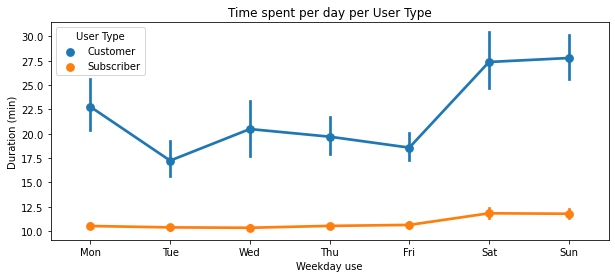

In [32]:
plt.figure(figsize=[10, 4])

# plot the point plot of month vs user type
#plt.subplot(1, 1, 1)
sb.pointplot(data=df_clean, x = 'start_time_day', y = 'duration_min', hue = 'user_type')
plt.xlabel('Weekday use')
plt.ylabel('Duration (min)')
plt.title('Time spent per day per User Type')
plt.legend(title = 'User Type', loc = 0);



In [42]:

plt.figure(figsize = [20, 4]);
df_user_day = df_clean.groupby('user_type')['start_time_day']
rel_freq = df_user_day.value_counts(normalize=True).mul(100)
set_rel_freq_df = rel_freq.rename('percent').reset_index()
#set_rel_freq.pipe((sb.catplot,'data'), x='start_time_day',y='percent',hue= 'user_type',kind='bar')
g = sb.catplot(data = set_rel_freq_df, x = 'start_time_day', y = 'percent', hue = 'user_type', kind = 'bar', order = weekdays)
plt.xlabel('Day') 
plt.title('Relative percentage rental by User Types per days of the week');
#plt.legend(title = 'User Type', loc = 0)

<Figure size 1440x288 with 0 Axes>



## What is the rental pattern of various users within the days of the week?

> There seems to be a shape change in the rate of rental by customers during weekends. 
- They probably could be tourists who need some leisure.

> Subscribers maintain a fairly consistent pattern during the rush hours of weedays. 
- They probably could be commuters.


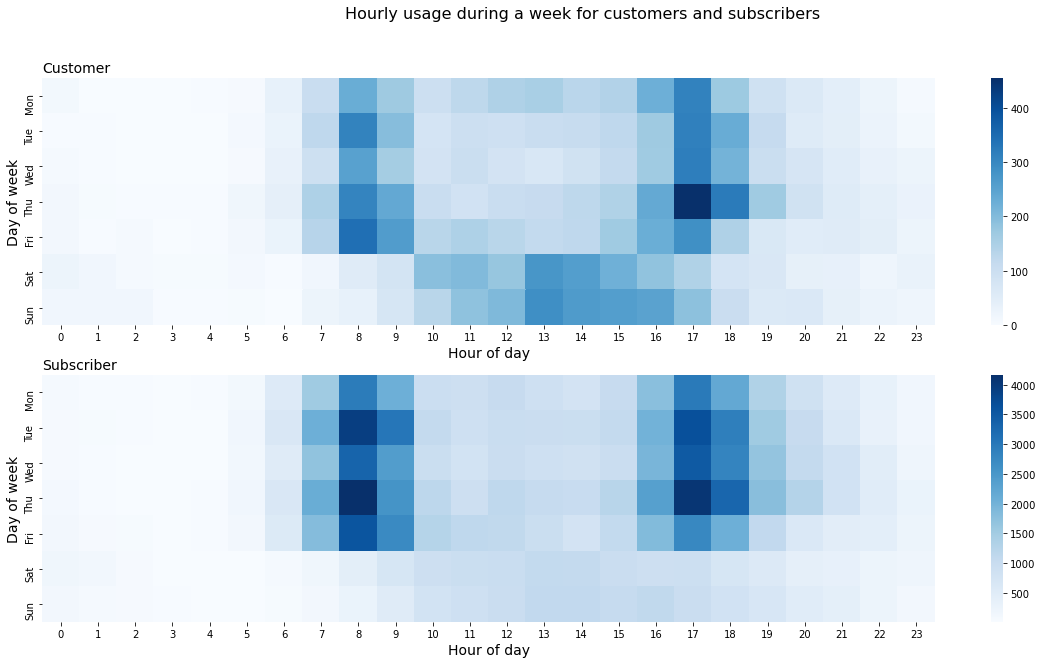

In [11]:


plt.figure(figsize=(20,10))

# plot at the top
plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
cus_counts = customers.groupby(['start_time_day', 'start_hr']).size()
cus_counts = cus_counts.reset_index(name='count')
cus_counts = cus_counts.pivot(index='start_time_day', columns='start_hr', values='count')
sb.heatmap(cus_counts, cmap="Blues")
plt.title('Customer', loc='left', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.ylabel('Day of week', fontsize=14)

# plot at the buttom
plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
sub_counts = subscribers.groupby(['start_time_day', 'start_hr']).size()
sub_counts = sub_counts.reset_index(name='count')
sub_counts = sub_counts.pivot(index='start_time_day', columns='start_hr', values='count')
sb.heatmap(sub_counts, cmap = 'Blues')
plt.title('Subscriber', loc='left', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.ylabel('Day of week', fontsize=14)

#plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16);


### Distribution of rentals for Top 10 starting stations per days of the week
> There seem to be a consistent pattern during the weekdays but a peak during the weekends
- Montgomery and Powell St Bart Stations recorded a drastic increase in rentals on Saturdays


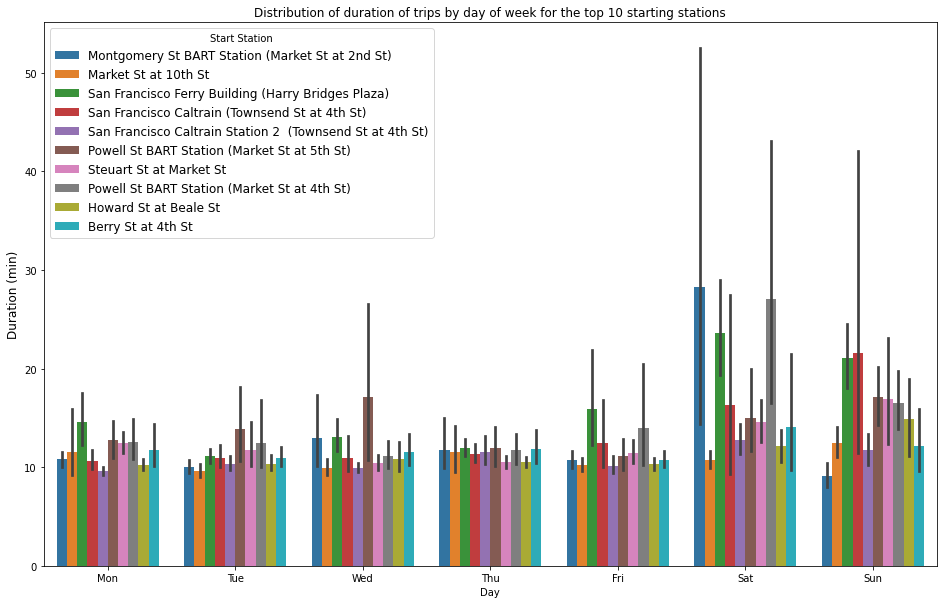

In [20]:
plt.figure(figsize=(16,10))
top_starting_points = df_clean['start_station_name'].value_counts().head(10)
top_starting_points_df = df_clean[df_clean['start_station_name'].isin(top_starting_points.index)]
sb.barplot(data = top_starting_points_df, x = 'start_time_day', y = 'duration_min', hue = 'start_station_name', order = weekdays)
plt.xlabel('Day')
plt.ylabel('Duration (min)', fontsize = 12)
plt.title('Distribution of duration of trips by day of week for the top 10 starting stations')
plt.legend(title = 'Start Station', fontsize = 12);


### Distribution of rentals for Top 10 destination stations per days of the week
> There seem to be a consistent pattern during the weekdays but a peak during the weekends
- San Francisco Ferry Building, Montgomery and Powell St Bart Stations recorded a drastic increase in rentals on Saturdays and Sundays.


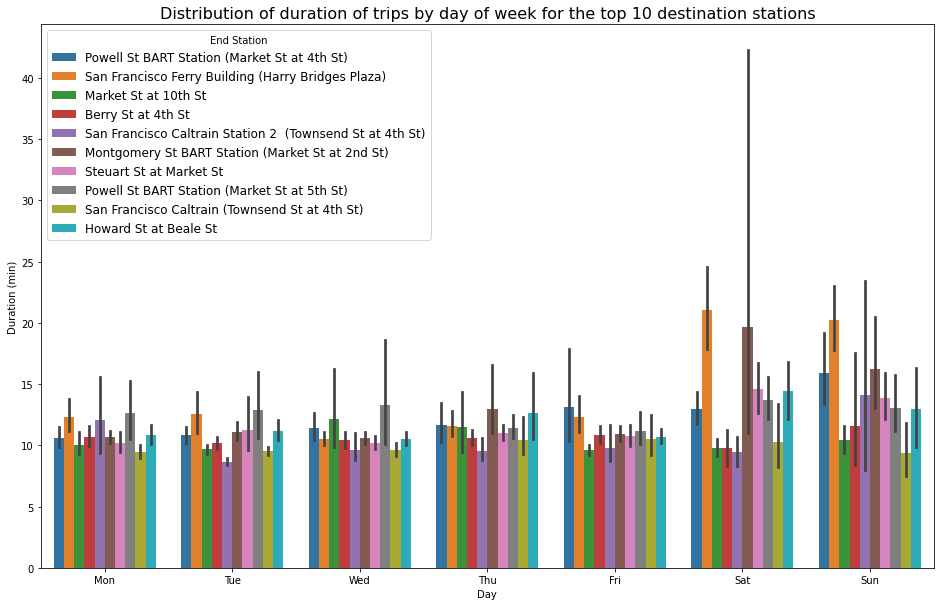

In [44]:
top_ending_points = df_clean['end_station_name'].value_counts().head(10)
top_ending_points_df = df_clean[df_clean['end_station_name'].isin(top_starting_points.index)]

plt.figure(figsize=(16,10))
sb.barplot(data = top_ending_points_df, x = 'end_time_day', y = 'duration_min', hue = 'end_station_name', order = weekdays)
plt.xlabel('Day')
plt.ylabel('Duration (min)')
plt.title('Distribution of duration of trips by day of week for the top 10 destination stations', fontsize = 16)
plt.legend(title = 'End Station', fontsize = 12);

### Conclusion

> Subscribers and customers have different motives for renting bikes.
- Subscribers are mostly commuters
- Customers are mostly tourists

> The distribution of bikes at various stations should be varied considering the lifestyle of users.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
